In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, nbinom, lognorm, pareto, gamma
import scipy.stats as stats
import seaborn as sns

In [48]:
# Load the claims data file into a DataFrame 
file_path = "/Users/thomasdeconinck/Documents/GitHub/Assurance-Code-Python/claim_data_group4_2024.csv"
claims_data = pd.read_csv(file_path)

In [49]:
claims_data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,2271893,0,0.83,E,5,17,53,64,B2,Diesel,3317,R93,0.0
1,1111864,0,0.24,E,5,2,27,64,B3,Diesel,2740,R22,0.0
2,72908,0,0.50,E,7,11,67,50,B3,Regular,4762,R93,0.0
3,2283027,0,0.08,B,5,8,28,60,B1,Diesel,64,R91,0.0
4,1123838,0,0.03,A,11,1,38,50,B2,Regular,16,R24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,70445,0,1.00,C,5,11,37,56,B2,Diesel,317,R82,0.0
99996,4163362,0,0.22,E,6,13,58,50,B1,Diesel,4762,R93,0.0
99997,2081912,0,1.00,E,5,1,49,50,B2,Diesel,4998,R11,0.0
99998,2012998,0,0.71,D,9,9,36,54,B1,Regular,1541,R91,0.0


# Descriptive Statistics

In [50]:
# Get descriptive statistics from the claims data set 
descriptive_stats = claims_data.describe()
descriptive_stats

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2.617735e+06,0.039020,0.528057,6.460230,6.992550,45.483040,59.822980,1800.69569,76.599887
std,1.643394e+06,0.206296,0.364232,2.055641,5.637297,14.154698,15.652541,3955.08311,1531.841302
min,1.500000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,2.00000,0.000000
25%,1.156127e+06,0.000000,0.170000,5.000000,2.000000,34.000000,50.000000,94.00000,0.000000
50%,2.271008e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,399.00000,0.000000
75%,4.044791e+06,0.000000,0.990000,7.000000,11.000000,55.000000,65.000000,1658.00000,0.000000
max,6.114324e+06,4.000000,1.000000,15.000000,100.000000,99.000000,230.000000,27000.00000,200000.000000


In [51]:
claims_data['ClaimNb'].value_counts()

ClaimNb
0    96335
1     3441
2      214
3        7
4        3
Name: count, dtype: int64

In [52]:
# Total claims by driver's age 
total_claims_by_age = claims_data.groupby('DrivAge')['ClaimNb'].sum()
total_claims_by_age = pd.DataFrame(total_claims_by_age)
total_claims_by_age

,ClaimNb
DrivAge,
18,6
19,30
20,55
21,42
22,58
...,...
94,0
95,1
96,0


In [53]:
# Total claims by vehicle's age 
total_claims_by_age = claims_data.groupby('VehAge')['ClaimNb'].sum()
total_claims_by_vech_age = pd.DataFrame(total_claims_by_age)
total_claims_by_vech_age

,ClaimNb
VehAge,
0,167
1,326
2,335
3,288
4,267
5,227
6,219
7,240
8,227


In [54]:
# Total claims by Bonus/Malus 
total_claims_by_bonus_malus = claims_data.groupby('BonusMalus')['ClaimNb'].sum()
total_claims_by_bonus_malus = pd.DataFrame(total_claims_by_bonus_malus)
total_claims_by_bonus_malus

,ClaimNb
BonusMalus,
50,1694
51,59
52,28
53,18
54,63
...,...
190,0
195,0
196,0


In [55]:
# Total claims by driver's age 
total_claims_by_age = claims_data.groupby('VehPower')['ClaimNb'].sum()
total_claims_by_vech_power = pd.DataFrame(total_claims_by_age)
total_claims_by_vech_power

,ClaimNb
VehPower,
4,529
5,764
6,929
7,849
8,257
9,194
10,157
11,112
12,57


In [56]:
# Filter out zero claim amounts for severity analysis
claim_counts = claims_data['ClaimNb']
non_zero_claims = claims_data[claims_data['ClaimAmount'] > 0]['ClaimAmount']

In [57]:
def calculate_aic(n, ll, k):
    """ Calculate Akaike Information Criterion. """
    return 2 * k - 2 * ll + 2 * k * (k + 1) / (n - k - 1)

def calculate_bic(n, ll, k):
    """ Calculate Bayesian Information Criterion. """
    return -2 * ll + k * np.log(n)

def plot_fit(x, dist, params, title, dist_type='continuous'):
    plt.figure(figsize=(10, 6))
    if dist_type == 'continuous':
        count, bins, ignored = plt.hist(x, bins=30, density=True, alpha=0.5, color='blue', label='Empirical Data')
        x_range = np.linspace(min(bins), max(bins), 100)
        probabilities = dist.pdf(x_range, *params) if dist != pareto else dist.pdf(x_range, *params, scale=1)
        plt.plot(x_range, probabilities, 'r-', linewidth=2, label=f'Fit: {dist.name}')
    else:
        weights = np.ones_like(x) / len(x)
        count, bins, ignored = plt.hist(x, bins=np.arange(x.min(), x.max() + 2) - 0.5, weights=weights, alpha=0.5, color='blue', label='Empirical Claims Data')
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        probabilities = dist.pmf(bin_centers, *params) if dist != pareto else dist.pmf(bin_centers, *params, scale=1)
        plt.plot(bin_centers, probabilities, 'r-', linewidth=2, label=f'Fit: {dist.name}')

    plt.title(title)
    plt.xlabel('Number of Claims' if dist_type == 'discrete' else 'Claim Amount')
    plt.ylabel('Probability' if dist_type == 'discrete' else 'Density')
    plt.legend()
    plt.show()

    # Safe log-likelihood calculation
    eps = 1e-10  # A small constant to prevent log(0)
    log_likelihood = np.sum(np.log(dist.pmf(x, *params) + eps)) if dist_type == 'discrete' else np.sum(np.log(dist.pdf(x, *params) + eps))
    n = len(x)
    k = len(params)
    aic = calculate_aic(n, log_likelihood, k)
    bic = calculate_bic(n, log_likelihood, k)
    print(f"AIC for {title}: {aic}")
    print(f"BIC for {title}: {bic}")

# Fitting Claim Frequency Distributions

## Fitting with Poisson, Binomial and Negative Binomial Distribution
We fit the claim frequency data to three different distributions: Poisson, Binomial, and Negative Binomial. For each distribution, the parameters are estimated using the respective fitting methods. The fitted parameters are then used to plot the frequency distribution.

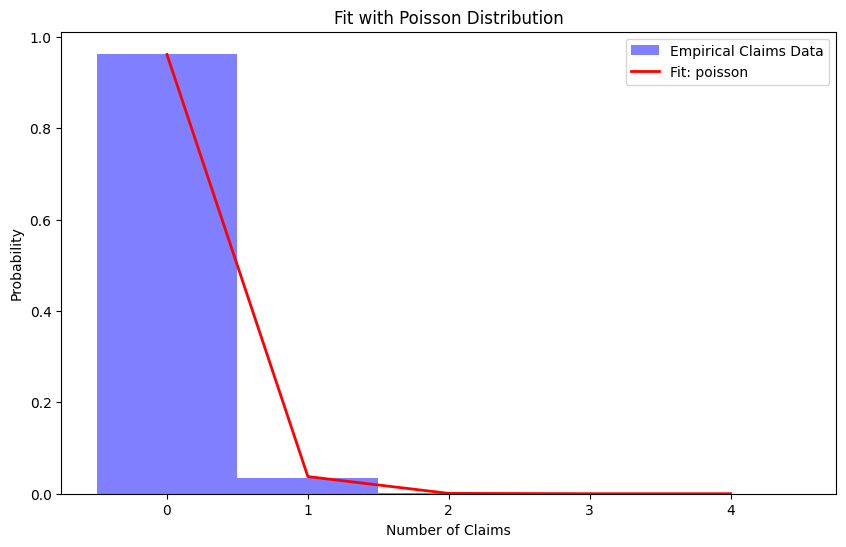

AIC for Fit with Poisson Distribution: 33460.499374859624
BIC for Fit with Poisson Distribution: 33470.0122603238


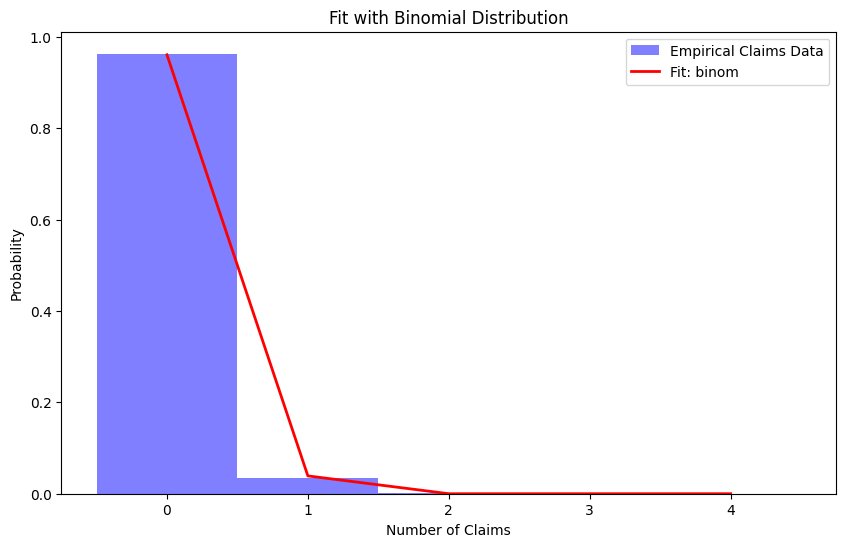

AIC for Fit with Binomial Distribution: 40311.18360245922
BIC for Fit with Binomial Distribution: 40330.20933338556


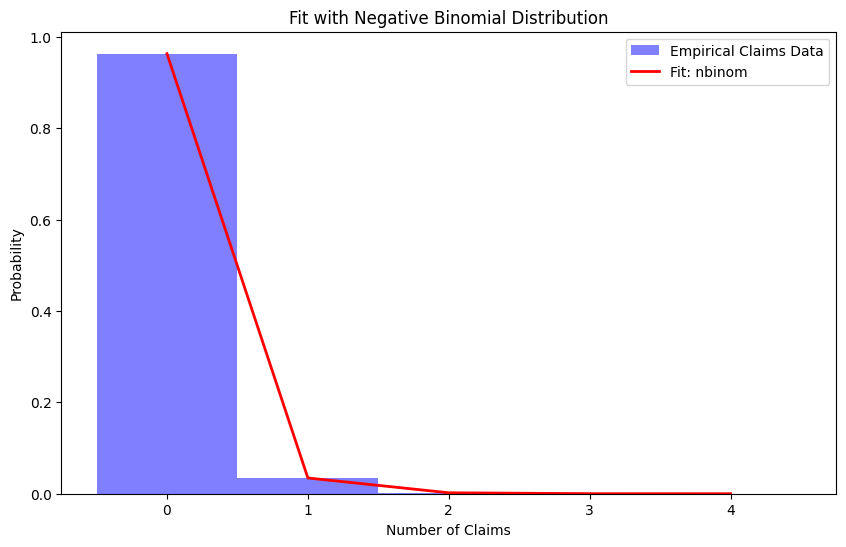

AIC for Fit with Negative Binomial Distribution: 33220.908366396994
BIC for Fit with Negative Binomial Distribution: 33239.934097323334


In [58]:
# Poisson Distribution Fitting
lambda_poisson = np.mean(claim_counts)
params_poisson = [lambda_poisson]
plot_fit(claim_counts, poisson, params_poisson, 'Fit with Poisson Distribution', dist_type='discrete')

# Binomial Distribution Fitting
n_trials = 1  # This should be adjusted based on your specific scenario
p_success = np.mean(claim_counts) / n_trials
params_binom = [n_trials, p_success]
plot_fit(claim_counts, binom, params_binom, 'Fit with Binomial Distribution', dist_type='discrete')

# Negative Binomial Distribution Fitting
r_negbin = (np.mean(claim_counts)**2) / (np.var(claim_counts) - np.mean(claim_counts))
p_negbin = r_negbin / (r_negbin + np.mean(claim_counts))
params_negbin = [r_negbin, p_negbin]
plot_fit(claim_counts, nbinom, params_negbin, 'Fit with Negative Binomial Distribution', dist_type='discrete')

In [59]:
def calculate_aic(n, ll, k):
    """
    Calculate Akaike Information Criterion.
    """
    return 2*k - 2*ll + 2*k*(k+1)/(n-k-1)

def calculate_bic(n, ll, k):
    """
    Calculate Bayesian Information Criterion.
    """
    return -2*ll + k*np.log(n)

def plot_fit_severity(x, dist, params, title):
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(x, bins=30, density=True, alpha=0.5, color='g', label='Empirical Severity Data')
    xmin, xmax = plt.xlim()
    x_range = np.linspace(xmin, xmax, 100)

    if dist != pareto:
        probabilities = dist.pdf(x_range, *params)
        log_likelihood = np.sum(np.log(dist.pdf(x, *params)))
    else:
        probabilities = dist.pdf(x_range, *params)
        log_likelihood = np.sum(np.log(dist.pdf(x, *params)))

    plt.plot(x_range, probabilities, 'k-', linewidth=2, label=f'Fit: {dist.name}')
    plt.title(title)
    plt.xlabel('Claim Amount')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Calculate AIC and BIC
    n = len(x)
    k = len(params)
    aic = calculate_aic(n, log_likelihood, k)
    bic = calculate_bic(n, log_likelihood, k)
    print(f"AIC for {title}: {aic}")
    print(f"BIC for {title}: {bic}")

# Fitting Claim Severity Distributions

## Fitting with Log-normal Distribution, Pareto and Gamma
We fit the claim severity data to a log-normal, Pareto and Gamma distribution. The parameters of the distribution are estimated using the `lognorm.fit` method with `floc` set to 0. 
The fitted parameters are then used to plot the severity distribution

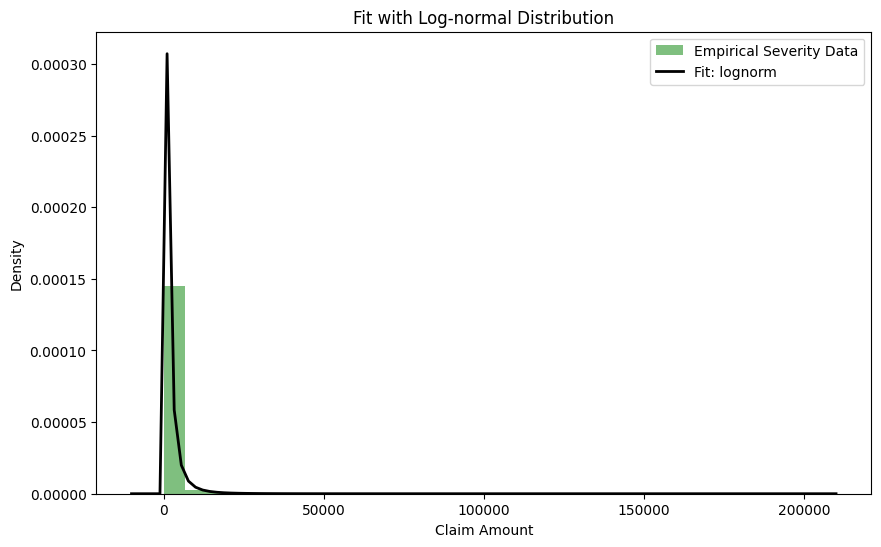

AIC for Fit with Log-normal Distribution: 61901.186253035194
BIC for Fit with Log-normal Distribution: 61919.79944829225


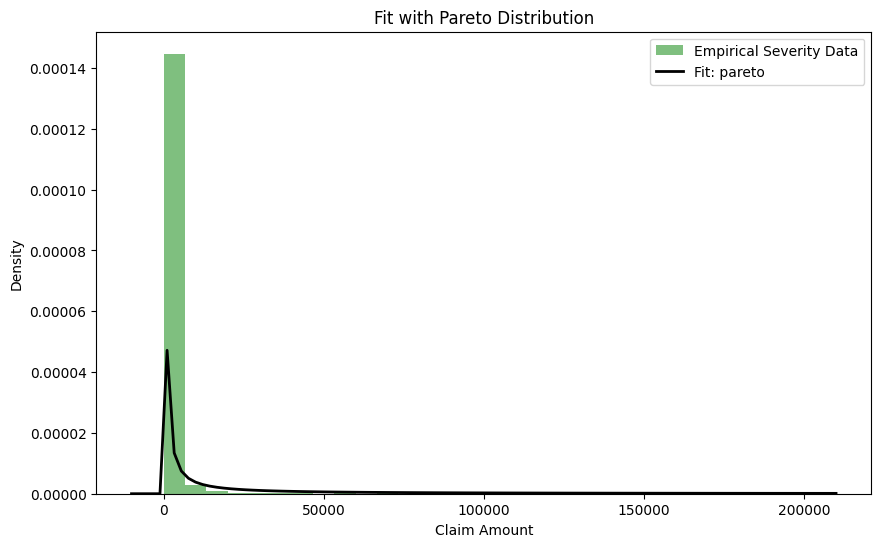

AIC for Fit with Pareto Distribution: 71878.08174119866
BIC for Fit with Pareto Distribution: 71896.69493645572


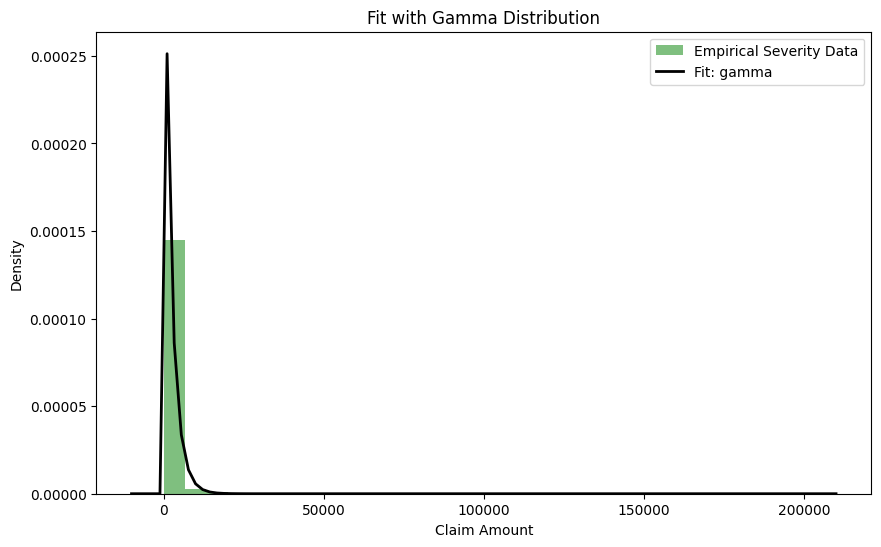

AIC for Fit with Gamma Distribution: 63202.40850800119
BIC for Fit with Gamma Distribution: 63221.021703258244


In [60]:
# Log-normal fitting
shape, loc, scale = lognorm.fit(non_zero_claims, floc=0)
params_lognorm = [shape, loc, scale]
plot_fit_severity(non_zero_claims, lognorm, params_lognorm, 'Fit with Log-normal Distribution')

# Pareto fitting
b, loc, scale = pareto.fit(non_zero_claims, floc=0)  # Fitting with floc set to 0
params_pareto = [b, loc, scale]
plot_fit_severity(non_zero_claims, pareto, params_pareto, 'Fit with Pareto Distribution')

# Gamma fitting
alpha, loc, beta = gamma.fit(non_zero_claims, floc=0)  # Adjusting fit parameters as needed
params_gamma = [alpha, loc, beta]
plot_fit_severity(non_zero_claims, gamma, params_gamma, 'Fit with Gamma Distribution')

# Choosing the Best Distribution for Claim Frequency and Severity

## Claim Frequency Distribution

To determine the best distribution for claim frequency, we compared the AIC and BIC values for Poisson, Binomial, and Negative Binomial distributions. The distribution with the lowest AIC and BIC values is considered the best fit.

### AIC and BIC Values for Claim Frequency Distributions:
- **Poisson Distribution**:
  - AIC: 33460.499374859624
  - BIC: 33470.0122603238
- **Negative Binomial Distribution**:
  - AIC: 33220.908366396994
  - BIC: 33239.934097323334
- **Binomial Distribution**:
  - AIC: 40311.18360245922
  - BIC: 40330.20933338556

### Conclusion:
The Negative Binomial distribution has the lowest AIC and BIC values, indicating that it is the best fit for the claim frequency data.

## Claim Severity Distribution

To determine the best distribution for claim severity, we compared the AIC and BIC values for Log-normal, Pareto, and Gamma distributions. The distribution with the lowest AIC and BIC values is considered the best fit.

### AIC and BIC Values for Claim Severity Distributions:
- **Log-normal Distribution**:
  - AIC: 61901.186253035194
  - BIC: 61919.79944829225
- **Pareto Distribution**:
  - AIC: 71878.08174119866
  - BIC: 71896.69493645572
- **Gamma Distribution**:
  - AIC: 63202.40850800119
  - BIC: 63221.021703258244

### Conclusion:
The Log-normal distribution has the lowest AIC and BIC values, indicating that it is the best fit for the claim severity data.

# Predicting Total Losses using Monte Carlo Simulation

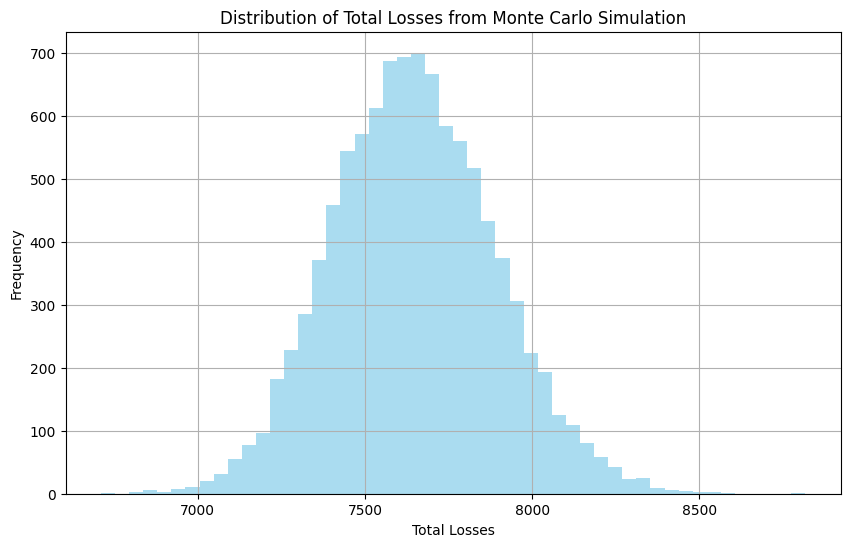

Expected Total Loss: 7647.024616774841
95th Percentile Total Loss (VaR 95%): 8056.161977686183
99th Percentile Total Loss (VaR 99%): 8244.14648808347


In [65]:
# Claim_counts holds historical claim frequency data
# Non_zero_claims holds historical non-zero claim severities

# Use the fitted parameters from the Negative Binomial and Log-normal fits

# For claim frequency (Negative Binomial)
params_negbin = [r_negbin, p_negbin]  # Fitted Negative Binomial params
# For claim severity (Log-normal)
params_lognorm = [shape, loc, scale]  # Fitted Log-normal params

# Number of simulations and policies
# Number of Monte Carlo simulations
n_simulations = 10000
# Number of policies in the dataset
n_policies = len(claims_data)  

# Array to store total losses from each simulation
total_losses = []

# Monte Carlo simulation loop
for _ in range(n_simulations):
    total_loss = 0
    for index, row in claims_data.iterrows():
        # Simulate number of claims for each policy using Negative Binomial distribution
        num_claims = nbinom.rvs(r_negbin, p_negbin)
        # Simulate claim severity for each claim using Log-normal distribution
        if num_claims > 0:
            claim_severity = lognorm.rvs(shape, loc, scale, size=num_claims)
            total_loss += claim_severity.sum()
    total_losses.append(total_loss)

# Convert to a numpy array for easier analysis
total_losses = np.array(total_losses)

# Analyze the distribution of total losses
expected_total_loss = np.mean(total_losses)
# Calculate Value-at-Risk (VaR) at different confidence levels (95% and 99%)
var_95 = np.percentile(total_losses, 95)  
var_99 = np.percentile(total_losses, 99)  

# Plot the total losses distribution and highlight VaR levels 
plt.figure(figsize=(10, 6))
plt.hist(total_losses, bins=50, color='skyblue', alpha=0.7)
plt.title('Distribution of Total Losses from Monte Carlo Simulation')
plt.xlabel('Total Losses')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Expected Total Loss: {expected_total_loss}")
print(f"95th Percentile Total Loss (VaR 95%): {var_95}")
print(f"99th Percentile Total Loss (VaR 99%): {var_99}")

# Resulting Distribution from Simulated Convolution

In this Monte Carlo simulation, we model the claim frequency using a Negative Binomial distribution and the claim severity using a Log-normal distribution. The resulting distribution of total losses from this convolution is an aggregated loss distribution.

## Characteristics of the Resulting Distribution:
- **Claim Frequency**: Modeled using a Negative Binomial distribution.
- **Claim Severity**: Modeled using a Log-normal distribution.
- **Total Losses**: The sum of individual claim severities for each simulated number of claims.

### Expected Distribution:
The resulting distribution of total losses is often approximated by:
- **Log-normal Distribution**: Due to the multiplicative nature of the claim severities.
- **Gamma Distribution**: Another common approximation for aggregated losses.

### Analysis of Simulated Total Losses:
- **Expected Total Loss**: The mean of the total losses from the simulations.
- **Value-at-Risk (VaR)**: Calculated at different confidence levels (e.g., 95% and 99%) to assess the risk of extreme losses.